In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

In [6]:
dataset = pd.read_csv('admissions_data.csv')

In [7]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
dataset.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [10]:
features = dataset.iloc[:, 0:-1]
labels = dataset.iloc[:, -1]

In [11]:
features = pd.get_dummies(features)

In [12]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=50)

In [13]:
numeric_features = features.select_dtypes(include=['float64', 'int64'])

In [14]:
numeric_columns = numeric_features.columns

In [15]:
ct = ColumnTransformer([('numeric only', StandardScaler(), numeric_columns)], remainder='passthrough')

In [16]:
features_train_scaled = ct.fit_transform(features_train)

In [17]:
features_test_scaled = ct.transform(features_test)

In [18]:
my_model = Sequential()

In [19]:
my_input = layers.InputLayer(input_shape=(features.shape[1], ))

In [20]:
my_model.add(my_input)

In [21]:
my_model.add(layers.Dense(64, activation='relu'))

In [22]:
my_model.add(layers.Dense(1))

In [23]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [24]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [25]:
my_model.compile(loss='mse', metrics=['mae'], optimizer=opt)

In [26]:
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)

In [27]:
history = my_model.fit(
    features_train_scaled, 
    labels_train,
    epochs=40,
    batch_size=4,
    verbose=1,
    validation_split=0.2,
    callbacks=[stop]
)
res_mse, res_mae = my_model.evaluate(
    features_test_scaled, 
    labels_test,
    verbose=0
)
print(f'RMSE: {res_mse}\nRMAE: {res_mae}')

Epoch 1/40
70/70 [==============================] - 0s 3ms/step - loss: 0.3386 - mae: 0.4617 - val_loss: 0.0831 - val_mae: 0.2217
Epoch 2/40
70/70 [==============================] - 0s 1ms/step - loss: 0.0534 - mae: 0.1814 - val_loss: 0.0440 - val_mae: 0.1621
Epoch 3/40
70/70 [==============================] - 0s 1ms/step - loss: 0.0313 - mae: 0.1385 - val_loss: 0.0263 - val_mae: 0.1274
Epoch 4/40
70/70 [==============================] - 0s 1ms/step - loss: 0.0211 - mae: 0.1148 - val_loss: 0.0174 - val_mae: 0.1029
Epoch 5/40
70/70 [==============================] - 0s 1ms/step - loss: 0.0158 - mae: 0.0989 - val_loss: 0.0143 - val_mae: 0.0935
Epoch 6/40
70/70 [==============================] - 0s 1ms/step - loss: 0.0123 - mae: 0.0883 - val_loss: 0.0108 - val_mae: 0.0826
Epoch 7/40
70/70 [==============================] - 0s 1ms/step - loss: 0.0106 - mae: 0.0812 - val_loss: 0.0095 - val_mae: 0.0766
Epoch 8/40
70/70 [==============================] - 0s 1ms/step - loss: 0.0087 - mae: 0.07

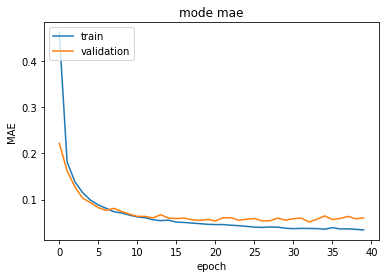

In [28]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('mode mae')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

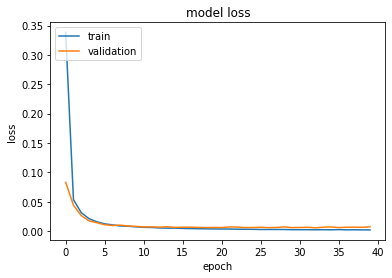

In [29]:
# plot loss and val_loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
predicted_values = my_model.predict(features_test)
print(r2_score(labels_test, predicted_values))

-99920.74952126593
